In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"D:\New folder (2)\Documents\Downloads\KNN\KNN\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

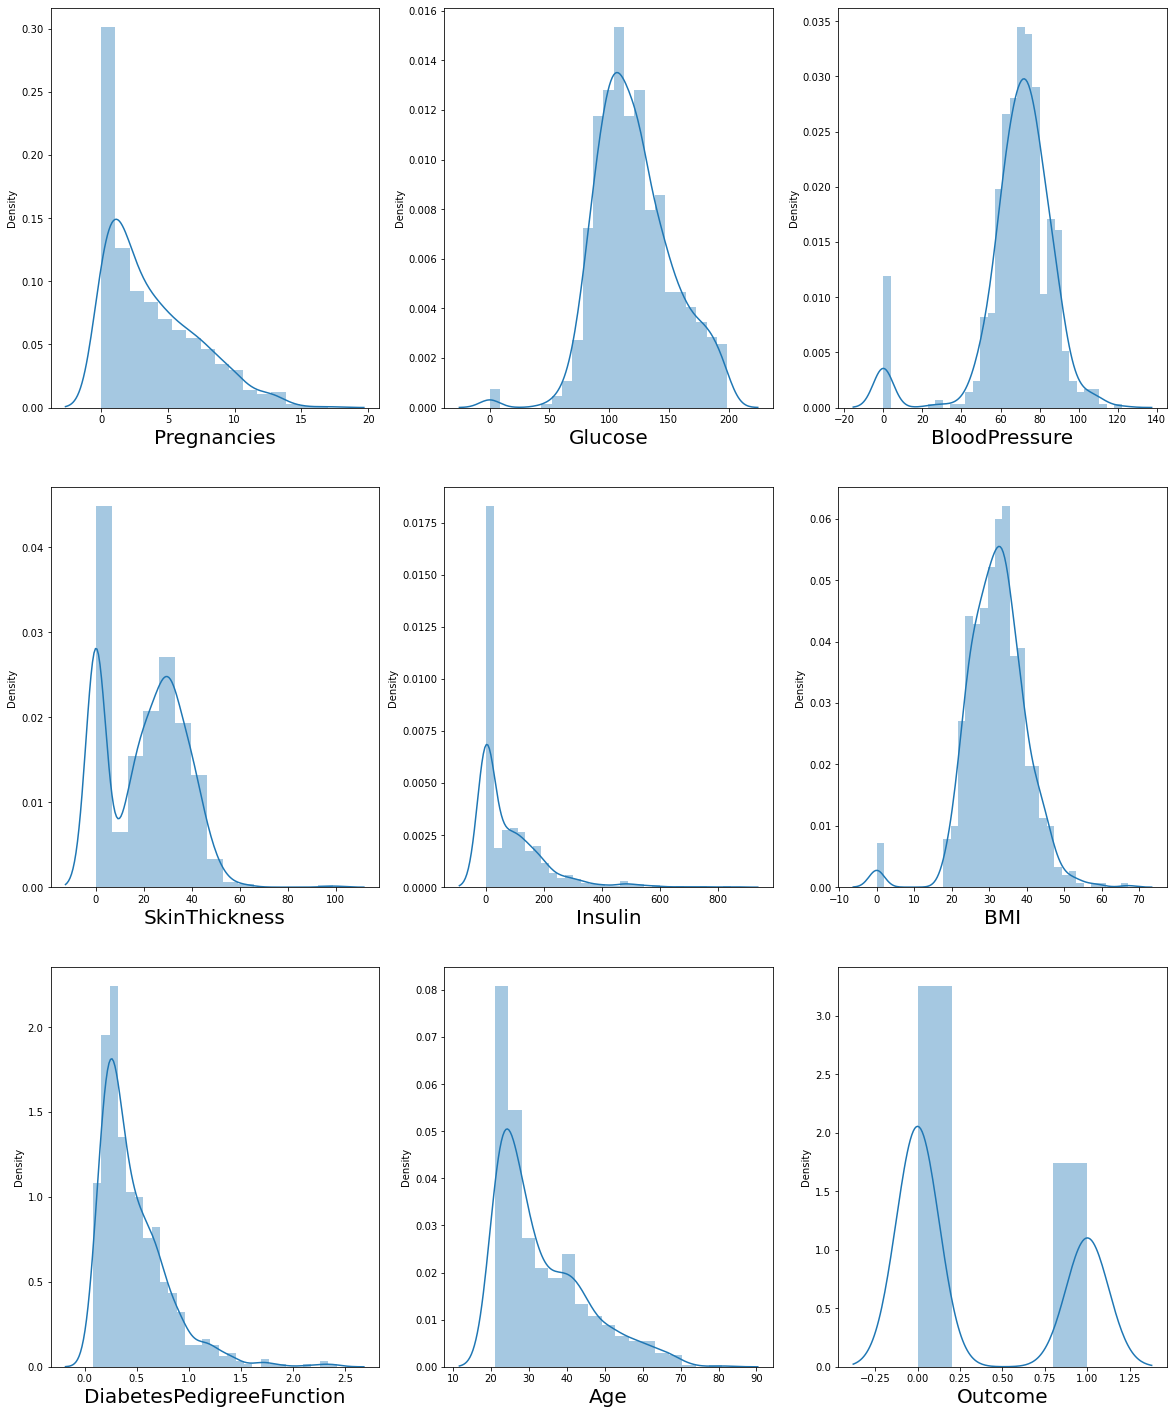

In [6]:
plt.figure(figsize=(20,25),facecolor="white")
plotnum=1

for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnum+=1
plt.show()


In [7]:
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

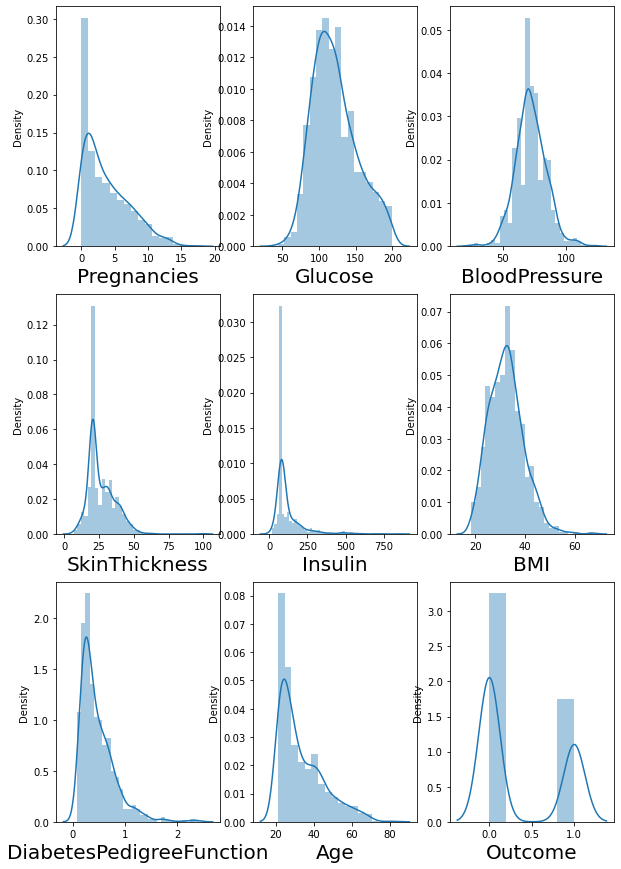

In [8]:
plt.figure(figsize=(10,15))
plotnum=1

for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnum+=1
plt.show()

In [9]:
import seaborn as sns

<AxesSubplot:>

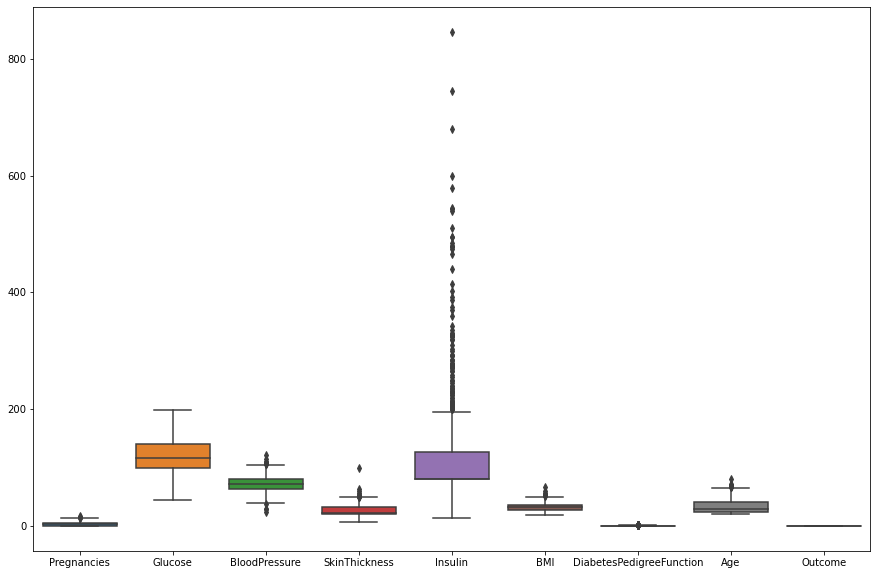

In [10]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax)

In [11]:
data["Insulin"]=np.where(data["Insulin"]>195,195,data["Insulin"])
data["Pregnancies"]=np.where(data["Pregnancies"]>10,10,data["Pregnancies"])
data["BloodPressure"]=np.where(data["BloodPressure"]>100,100,data["BloodPressure"])
data["BloodPressure"]=np.where(data["BloodPressure"]<40,40,data["BloodPressure"])
data["SkinThickness"]=np.where(data["SkinThickness"]>50,50,data["SkinThickness"])
data["BMI"]=np.where(data["BMI"]>50,50,data["BMI"])
data["Age"]=np.where(data["Age"]>60,60,data["Age"])

<AxesSubplot:>

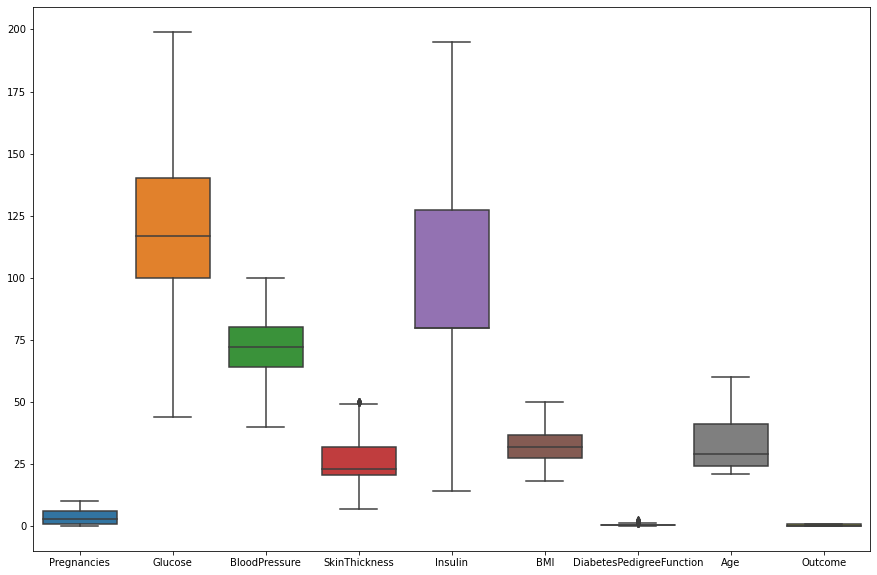

In [12]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax)

In [13]:
x=data.drop(columns=["Outcome"])
y=data["Outcome"]

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [15]:
scaler=StandardScaler()

In [16]:
x_scaled=scaler.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=35)

In [19]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
knn.score(x_train,y_train)

0.8249534450651769

In [22]:
y_predict=knn.predict(x_test)

In [23]:
accuracy_score(y_predict,y_test)

0.7186147186147186

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid={"algorithm":["ball_tree","kd_tree","brute"],
           "n_neighbors":[9,11.13,15],
           "leaf_size":[2,4,6,8]
          }

In [26]:
gd=GridSearchCV(knn,param_grid,verbose=2)

In [27]:
gd.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....algorithm=ball_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV] END ....algorithm=ball_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV] END ....algorithm=ball_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV] END ....algorithm=ball_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV] END ....algorithm=ball_tree, leaf_size=2, n_neighbors=9; total time=   0.0s


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 520, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 

[CV] END algorithm=ball_tree, leaf_size=2, n_neighbors=11.13; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=2, n_neighbors=11.13; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=2, n_neighbors=11.13; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=2, n_neighbors=11.13; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=2, n_neighbors=11.13; total time=   0.0s
[CV] END ...algorithm=ball_tree, leaf_size=2, n_neighbors=15; total time=   0.0s
[CV] END ...algorithm=ball_tree, leaf_size=2, n_neighbors=15; total time=   0.0s
[CV] END ...algorithm=ball_tree, leaf_size=2, n_neighbors=15; total time=   0.0s
[CV] END ...algorithm=ball_tree, leaf_size=2, n_neighbors=15; total time=   0.0s
[CV] END ...algorithm=ball_tree, leaf_size=2, n_neighbors=15; total time=   0.0s
[CV] END ....algorithm=ball_tree, leaf_size=4, n_neighbors=9; total time=   0.0s
[CV] END ....algorithm=ball_tree, leaf_size=4, n_neighbors=9; total time=   0.0s
[CV] END ....algorithm=ball_

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 520, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 

[CV] END ......algorithm=kd_tree, leaf_size=4, n_neighbors=9; total time=   0.0s
[CV] END ......algorithm=kd_tree, leaf_size=4, n_neighbors=9; total time=   0.0s
[CV] END ......algorithm=kd_tree, leaf_size=4, n_neighbors=9; total time=   0.0s
[CV] END ......algorithm=kd_tree, leaf_size=4, n_neighbors=9; total time=   0.0s
[CV] END ......algorithm=kd_tree, leaf_size=4, n_neighbors=9; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=4, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=4, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=4, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=4, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=4, n_neighbors=11.13; total time=   0.0s
[CV] END .....algorithm=kd_tree, leaf_size=4, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=kd_tree, leaf_size=4, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=kd_t

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 520, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 

[CV] END ......algorithm=kd_tree, leaf_size=8, n_neighbors=9; total time=   0.0s
[CV] END ......algorithm=kd_tree, leaf_size=8, n_neighbors=9; total time=   0.0s
[CV] END ......algorithm=kd_tree, leaf_size=8, n_neighbors=9; total time=   0.0s
[CV] END ......algorithm=kd_tree, leaf_size=8, n_neighbors=9; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=8, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=8, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=8, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=8, n_neighbors=11.13; total time=   0.0s
[CV] END ..algorithm=kd_tree, leaf_size=8, n_neighbors=11.13; total time=   0.0s
[CV] END .....algorithm=kd_tree, leaf_size=8, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=kd_tree, leaf_size=8, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=kd_tree, leaf_size=8, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=kd_t

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 520, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 


[CV] END .......algorithm=brute, leaf_size=4, n_neighbors=15; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=4, n_neighbors=15; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=4, n_neighbors=15; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=4, n_neighbors=15; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=4, n_neighbors=15; total time=   0.0s
[CV] END ........algorithm=brute, leaf_size=6, n_neighbors=9; total time=   0.0s
[CV] END ........algorithm=brute, leaf_size=6, n_neighbors=9; total time=   0.0s
[CV] END ........algorithm=brute, leaf_size=6, n_neighbors=9; total time=   0.0s
[CV] END ........algorithm=brute, leaf_size=6, n_neighbors=9; total time=   0.0s
[CV] END ........algorithm=brute, leaf_size=6, n_neighbors=9; total time=   0.0s
[CV] END ....algorithm=brute, leaf_size=6, n_neighbors=11.13; total time=   0.0s
[CV] END ....algorithm=brute, leaf_size=6, n_neighbors=11.13; total time=   0.0s
[CV] END ....algorithm=brut

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 520, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, enter integer value

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 4, 6, 8],
                         'n_neighbors': [9, 11.13, 15]},
             verbose=2)

In [28]:
gd.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 15}

In [29]:
knn=KNeighborsClassifier(algorithm="ball_tree",leaf_size=2,n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=15)

In [30]:
knn.score(x_train,y_train)

0.813780260707635

In [31]:
y_predict=knn.predict(x_test)

In [32]:
accuracy_score(y_predict,y_test)

0.7316017316017316

In [33]:
cross_val_score(KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =2, n_neighbors =15), x_scaled, y,cv=5)

array([0.77272727, 0.75324675, 0.77922078, 0.81045752, 0.75816993])

In [34]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()

0.7513878278584161

In [36]:
test=knn.predict(np.asarray([[5,140,68,44,110,33.4,3.1,45]]))


In [37]:
test

array([1], dtype=int64)